In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

# Apply Style
plt.style.use('bmh')
%matplotlib inline

In [67]:
import yfinance as yf
import datetime as dt

stock = "AAPL"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [68]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2000-01-03 00:00:00+00:00,0.843076,0.999442,1.004464,0.907924,0.936384,535796800
2000-01-04 00:00:00+00:00,0.771997,0.915179,0.987723,0.903460,0.966518,512377600
2000-01-05 00:00:00+00:00,0.783293,0.928571,0.987165,0.919643,0.926339,778321600
2000-01-06 00:00:00+00:00,0.715509,0.848214,0.955357,0.848214,0.947545,767972800
2000-01-07 00:00:00+00:00,0.749401,0.888393,0.901786,0.852679,0.861607,460734400


In [69]:
df.shape

(6248, 6)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6248 entries, 2000-01-03 00:00:00+00:00 to 2024-10-31 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  6248 non-null   float64
 1   (Close, AAPL)      6248 non-null   float64
 2   (High, AAPL)       6248 non-null   float64
 3   (Low, AAPL)        6248 non-null   float64
 4   (Open, AAPL)       6248 non-null   float64
 5   (Volume, AAPL)     6248 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 341.7 KB


In [71]:
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [72]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,6248.000000,6248.000000,6248.000000,6248.000000,6248.000000,6.248000e+03
mean,39.996768,41.440094,41.853831,40.988816,41.413185,3.881538e+08
std,58.248080,58.533771,59.101591,57.906475,58.486395,3.839933e+08
min,0.197631,0.234286,0.235536,0.227143,0.231964,2.404830e+07
25%,1.990320,2.359464,2.395804,2.314197,2.368840,1.178417e+08
50%,13.653457,15.921072,16.146071,15.788393,15.923392,2.701608e+08
75%,42.880471,44.785001,45.149374,44.458750,44.864999,5.210149e+08
max,236.220108,236.479996,237.490005,234.449997,236.479996,7.421641e+09


In [73]:
df = df.reset_index()

In [74]:
df.columns

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [75]:
df.to_csv("apple.csv")

In [76]:
data1 = pd.read_csv("apple.csv")

In [77]:
data1.head()

,Price,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NaN,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,0,2000-01-03 00:00:00+00:00,0.8430764675140381,0.9994419813156128,1.004464030265808,0.9079239964485168,0.9363840222358704,535796800
2,1,2000-01-04 00:00:00+00:00,0.7719968557357788,0.9151790142059326,0.9877229928970337,0.9034600257873535,0.966517984867096,512377600
3,2,2000-01-05 00:00:00+00:00,0.7832934856414795,0.9285709857940674,0.9871649742126465,0.919642984867096,0.9263389706611633,778321600
4,3,2000-01-06 00:00:00+00:00,0.7155086398124695,0.8482139706611633,0.955357015132904,0.8482139706611633,0.9475449919700623,767972800


In [78]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data1['Date'], open = data1['Open'],
                                    high = data1['High'],
                                    low = data1['Low'],
                                    close = data1['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [79]:
df = df.drop(['Adj Close'], axis = 1)

<ipython-input-79-bcbd50352b31>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [80]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2000-01-03 00:00:00+00:00,0.999442,1.004464,0.907924,0.936384,535796800
1,2000-01-04 00:00:00+00:00,0.915179,0.987723,0.903460,0.966518,512377600
2,2000-01-05 00:00:00+00:00,0.928571,0.987165,0.919643,0.926339,778321600
3,2000-01-06 00:00:00+00:00,0.848214,0.955357,0.848214,0.947545,767972800
4,2000-01-07 00:00:00+00:00,0.888393,0.901786,0.852679,0.861607,460734400


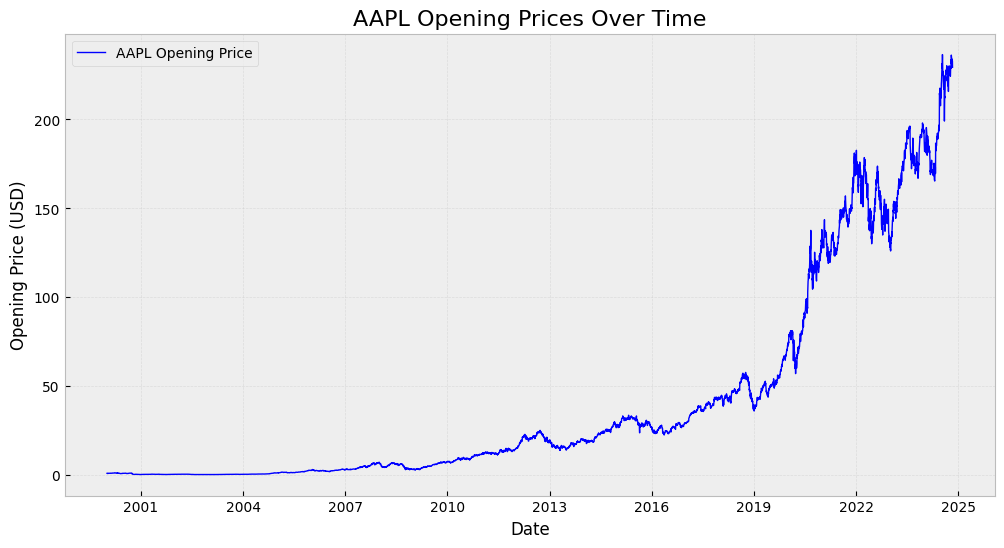

In [81]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ensure Date is datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label=f'{stock} Opening Price', linewidth=1, color='blue')
plt.title(f'{stock} Opening Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Opening Price (USD)', fontsize=12)

# Format the x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Year format
plt.gca().xaxis.set_major_locator(mdates.YearLocator(3))         # Every year

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend()

plt.show()


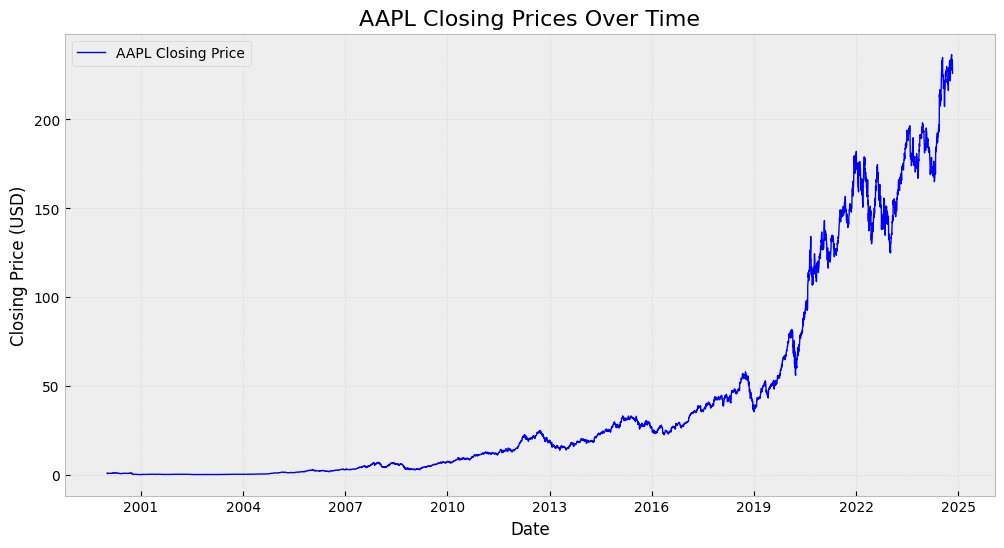

In [82]:
# Plot Closing Price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label=f'{stock} Closing Price', linewidth=1, color='blue')

# Add title and labels
plt.title(f'{stock} Closing Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)

# Format the x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Year format
plt.gca().xaxis.set_major_locator(mdates.YearLocator(3))         # Every year

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend()

# Show plot
plt.show()

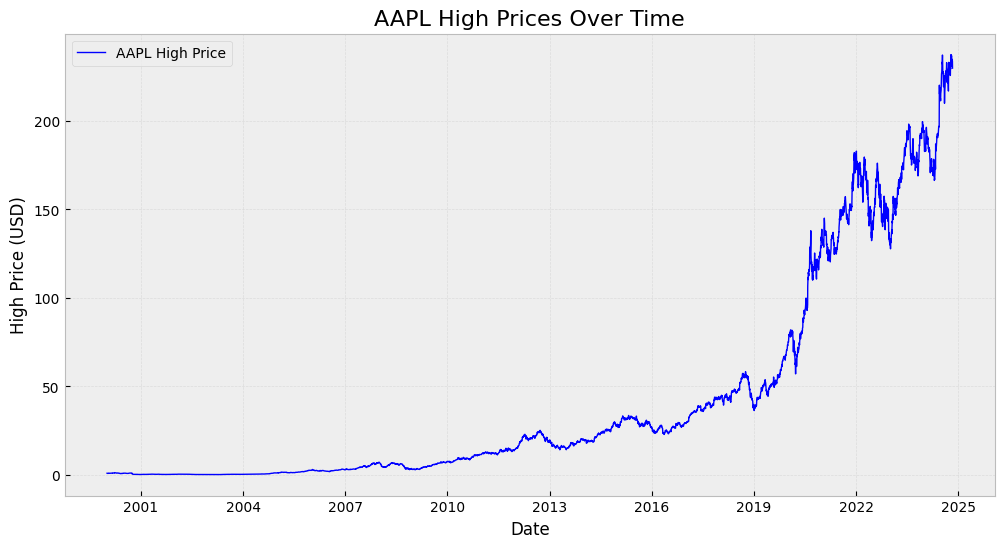

In [83]:
# Plot High Price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['High'], label=f'{stock} High Price', linewidth=1, color='blue')

# Add title and labels
plt.title(f'{stock} High Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('High Price (USD)', fontsize=12)

# Format the x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Year format
plt.gca().xaxis.set_major_locator(mdates.YearLocator(3))         # Every year

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend()

# Show plot
plt.show()

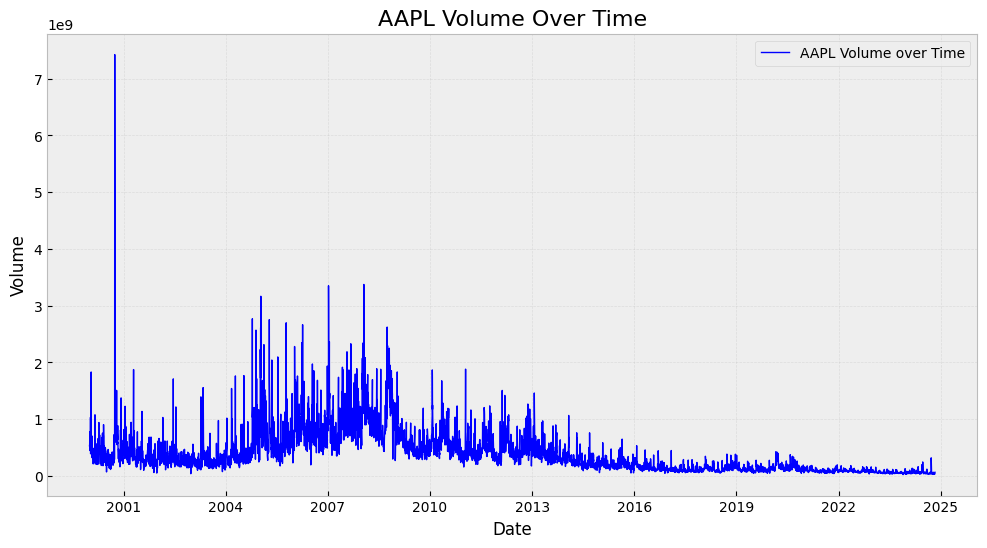

In [84]:
# Volume over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label=f'{stock} Volume over Time', linewidth=1, color='blue')

# Add title and labels
plt.title(f'{stock} Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)

# Format the x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Year format
plt.gca().xaxis.set_major_locator(mdates.YearLocator(3))         # Every year

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend()

# Show plot
plt.show()

In [85]:
# Moving Average

ma50 = df['Close'].rolling(50).mean()
ma100 = df['Close'].rolling(100).mean()
ma200 = df['Close'].rolling(200).mean()

In [86]:
ma50

Ticker,AAPL
Date,
2000-01-03 00:00:00+00:00,NaN
2000-01-04 00:00:00+00:00,NaN
2000-01-05 00:00:00+00:00,NaN
2000-01-06 00:00:00+00:00,NaN
2000-01-07 00:00:00+00:00,NaN
...,...
2024-10-25 00:00:00+00:00,226.8016
2024-10-28 00:00:00+00:00,226.9486
2024-10-29 00:00:00+00:00,227.1042


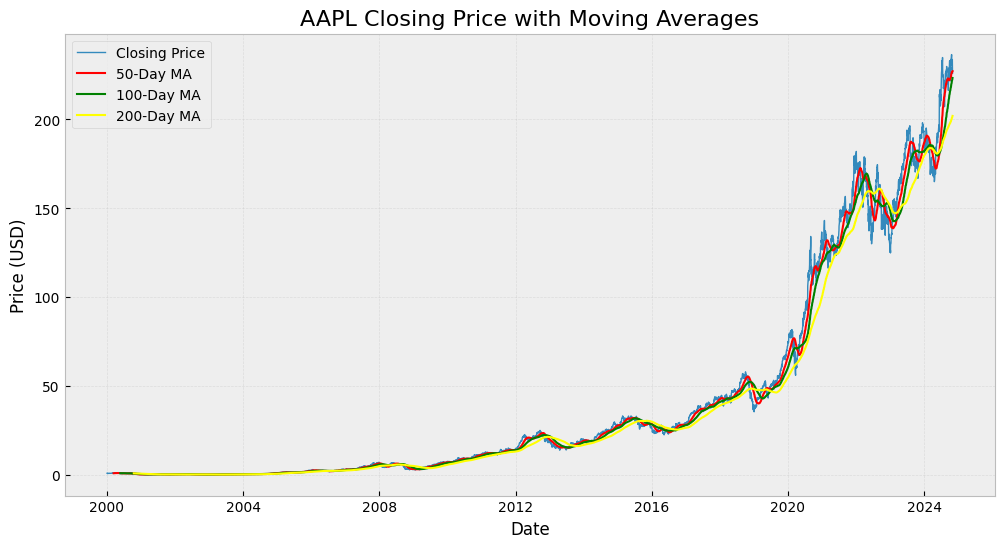

In [87]:
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Close'], label='Closing Price', linewidth=1)
plt.plot(df.index, ma50, label='50-Day MA', linewidth=1.5, color='red')
plt.plot(df.index, ma100, label='100-Day MA', linewidth=1.5, color='green')
plt.plot(df.index, ma200, label='200-Day MA', linewidth=1.5, color='yellow')

plt.title(f'{stock} Closing Price with Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [88]:
# Exponential Moving Average

ema50 = df['Close'].ewm(span=50, adjust = False).mean()
ema100 = df['Close'].ewm(span=100, adjust = False).mean()
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

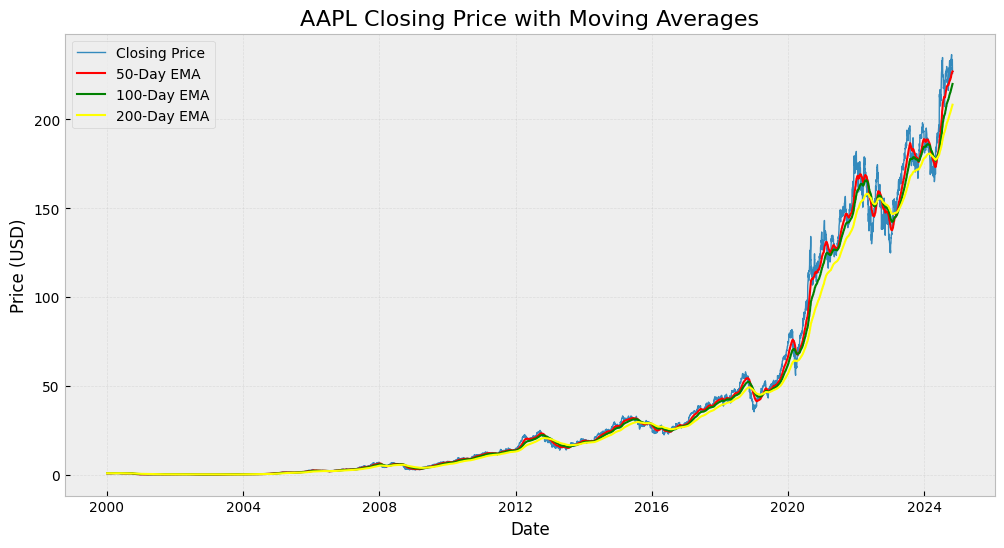

In [89]:
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Close'], label='Closing Price', linewidth=1)
plt.plot(df.index, ema50, label='50-Day EMA', linewidth=1.5, color='red')
plt.plot(df.index, ema100, label='100-Day EMA', linewidth=1.5, color='green')
plt.plot(df.index, ema200, label='200-Day EMA', linewidth=1.5, color='yellow')

plt.title(f'{stock} Closing Price with Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

plt.grid(alpha=0.3)
plt.legend()
plt.show()

# **USING LSTM FOR PREDICTING**

In [90]:
# Dividing data into training and testing data (70% train, 30% test)

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [91]:
data_training.shape

(4373, 1)

In [92]:
data_testing.shape

(1875, 1)

In [93]:
# Use min-max scaler to transform data into a 0 to 1 range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [94]:
data_training_array = scaler.fit_transform(data_training)

In [95]:
data_training_array

array([[0.01972524],
       [0.01755299],
       [0.01789823],
       ...,
       [0.96229764],
       [0.97705628],
       [0.98040763]])

In [96]:
data_training_array.shape[0]

4373

In [97]:
x_train = []
y_train = []

for i in range(50, data_training_array.shape[0]):
    x_train.append(data_training_array[i-50: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [98]:
x_train.shape

(4323, 50, 1)

# **MODEL BUILDING**

In [99]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


LSTM Input -> 3D Array (batch_size, time_steps, seq_len) LSTM 2D OR 3D 2D -> (batch_sizem units) 3D -> (batch_size, time_steps, units)

In [100]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

# Define the model
model = Sequential()

# Add an Input layer (modern practice to explicitly define input shape)
model.add(Input(shape=(x_train.shape[1], 1)))

# First LSTM layer with Dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Second LSTM layer with Dropout
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer with Dropout
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer (final output without `return_sequences`)
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

In [101]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50, 60)              │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 50, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 148ms/step - loss: 0.0320
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 23s 165ms/step - loss: 0.0043
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 40s 160ms/step - loss: 0.0042
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 40s 153ms/step - loss: 0.0039
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - loss: 0.0033
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - loss: 0.0031
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 42s 160ms/step - loss: 0.0030
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 22s 164ms/step - loss: 0.0029
Epoch 9/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 23s 166ms/step - loss: 0.0024
Epoch 10/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step - loss: 0.0028
Epoch 11/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 44s 173ms/step - loss: 0.0027
Epoch 12/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - loss: 0.0026
Epoch 13/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - loss: 0.0023
Epoch 14/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 42s 161ms/step - loss: 0.0027
Epoch 15/50
136

In [103]:
past_50_days = data_training.tail(50)

In [104]:
final_df = pd.concat([past_50_days, data_testing], ignore_index=True)

In [105]:
final_df.head()

Ticker,AAPL
0,34.785000
1,34.799999
2,34.747501
3,35.115002
4,35.172501


In [106]:
input_data = scaler.fit_transform(final_df)

In [107]:
x_test = []
y_test = []

for i in range(50, input_data.shape[0]):
    x_test.append(input_data[i-50:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [108]:
x_test.shape

(1875, 50, 1)

In [109]:
y_predicted = model.predict(x_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step


In [110]:
y_predicted.shape

(1875, 1)

In [111]:
scaler.scale_

array([0.00495706])

In [112]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

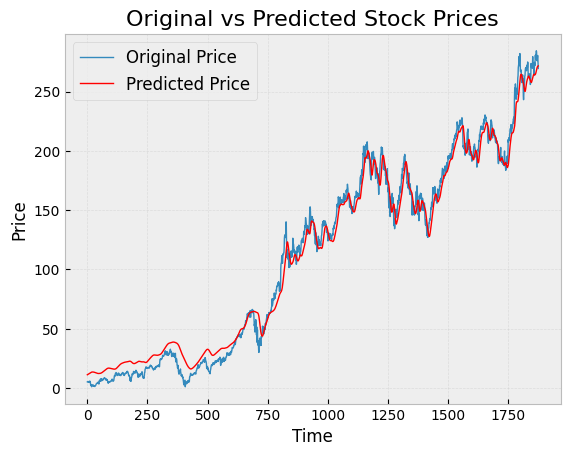

In [113]:
# Plot Original Prices
plt.plot(y_test, label='Original Price', linewidth=1)

# Plot Predicted Prices
plt.plot(y_predicted, label='Predicted Price', linewidth=1, color='red')

# Add title and labels
plt.title('Original vs Predicted Stock Prices', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Customize legend
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(alpha=0.3)

# Show plot
plt.show()


In [114]:
model.save('stock_dl_model.keras')